
# DMT 2022 - Homework 3


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2022-HW3.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * **The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. Make sure that, when you deliver it, that comment returns to line \<TOT>. DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.**

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ----------YOUR TEXT STARTS HERE----------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ----------YOUR TEXT STARTS HERE----------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

# Homework
In this homework, your goal will be to obtain the best classification on the provided dataset according to a metric specified in each section.

Ensure that the results you obtain can be accurately replicated by anyone running the notebook.

If you have to set a random seed, always choose: `2468`.

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Fazzone, Adriano, 987654

Siciliano, Federico, 999888

----------YOUR TEXT STARTS HERE----------

Boesso, Simone, 1800408

Pecile, Giulio, 1872568

# Part 1
In this part of the homework, simple data encodings will be used.

## Part 1.0
Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import pandas as pd
from nltk import * 
from sklearn import neighbors,svm,pipeline,model_selection,feature_extraction,metrics,preprocessing,ensemble,decomposition
import time
import numpy as np
import nltk ;  import matplotlib.pyplot as plt
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 1.0.1
Download the dataset from the Drive link (code already provided).

The dataset is a list of reviews, containing the text and the sentiment of the review; 1 represents a positive review, while 0 represents a negative review. The file has no header.

In [ ]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#REMOVE_OUTPUT#
!gdown 1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs #download hw3_data.csv

Downloading...
From: https://drive.google.com/uc?id=1oDvIo7sMAlxdF82uMXkYEmoeV7P4evcs
To: /content/hw3_data.csv
100% 10.7M/10.7M [00:00<00:00, 61.0MB/s]


## Part 1.1
In this part, we will perform a tf-idf encoding of the data,
and then train a classifier, optimising its hyper-parameters.

In the various steps, we will slowly prepare a pipeline to perform a hyper-parameter optimisation; try to prepare the required objects with this target in mind.

The goal is to maximise the f1-score on the test set that will be defined in step 1.1.2.

### 1.1.1
Load and inspect the dataset: print the total number of rows.

Print also the first 3 rows of the dataset.

In [ ]:
#YOUR CODE STARTS HERE#
# we load the db
df = pd.read_csv('/content/hw3_data.csv', header=None)
print('The total number of rows is {}\n\n'.format(len(df)))
print('The first three rows are:')
df.columns = ['name', 'label']
df = df.dropna()
df[:3]










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The total number of rows is 23334


The first three rows are:


,name,label
0,"When I first had this tea, the taste was famil...",1
1,There was no size information included in Amaz...,1
2,This one is just as bright as the AA Mini MagL...,1


### 1.1.2
Divide the dataset into training set (85%) and test set (15%).

Print out the percentage of samples with positive labels in the training set and the percentage of samples with positive labels in the test set.

In [ ]:
#YOUR CODE STARTS HERE#
# we split the dataset 
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['name'], df['label'], test_size=0.15, shuffle=True , random_state= 2468)
print('The percentage of positive labels in the train set is: {}%'.format(
    round(100*sum(y_train>0)/len(y_train), 2)))
print('The percentage of positive labels in the test set is: {}%'.format(
    round(100*sum(y_test>0)/len(y_test), 2)))



y_train = np.array(y_train.astype('int'))
y_test = np.array(y_test.astype('int'))
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()




#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The percentage of positive labels in the train set is: 50.0%
The percentage of positive labels in the test set is: 50.0%


### 1.1.3
Create an object that performs a tf-idf transformation on the data. The transformation must strip accents.

Create a dictionary containing configurations for the tf-idf vectorizer.
The configurations must vary at least 3 different parameters.

In [ ]:
#YOUR CODE STARTS HERE#
nltk.download('punkt')
nltk.download('stopwords')
# we define the used function for the stemming
stemmer = nltk.stem.snowball.EnglishStemmer()
def stemming_tokenizer(text):
	stemmed_text = [stemmer.stem(word) for word in nltk.word_tokenize(text, language='english')]
	return stemmed_text


c = {0: {'vect__tokenizer': [stemming_tokenizer],"vect__stop_words" : ["english"],'vect__ngram_range': [(1, 1)],'KNN__n_neighbors': [1,2,3,4,5],},1:{'vect__tokenizer': [None],"vect__stop_words" : [None],'vect__ngram_range': [(1, 2)],'SVC__C': [0.1, 0.2, 0.3, 0.4,0.5],}}

vectorizer = feature_extraction.text.TfidfVectorizer(strip_accents = "unicode", preprocessor = None)
vect_train_x = vectorizer.fit_transform(X_train)




#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 1.1.4
Choose a maximum of 2 classification algorithms (from those seen during the course) and prepare objects containing them.

For each of the selected classification algorithms, prepare a hyper-parameter configuration with exactly **5 values** for **EACH parameter**.

> **If a parameter is itself composed of several parameters (if it is a dictionary, for example), each of these will need to have 5 values.*

In [ ]:
#YOUR CODE STARTS HERE#
pipeline_1 = pipeline.Pipeline([
	('vect', vectorizer),
	('KNN', neighbors.KNeighborsClassifier()),
	])
pipeline_2 = pipeline.Pipeline([
	('vect', vectorizer),
	('SVC', svm.SVC()),
	])
# we define all the parameters for the KNN classifier
parameters_knn = {'vect__tokenizer': [stemming_tokenizer],"vect__stop_words" : ["english"], 'vect__ngram_range': [(1, 2)],'KNN__n_neighbors': [1,2,3,4,5]}
# we define all the parameter for the SVC classifier
parameters_SVC = {'vect__tokenizer': [None],"vect__stop_words" : [None], 'vect__ngram_range': [(1, 1)],'SVC__C': [0.1, 0.2, 0.3, 0.4,0.5]}















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 1.1.5
For each of the classification algorithms selected in step 1.1.4,
perform a 3-fold Cross-Validation on the training set, combining the configurations of the vectorizer defined in step 1.1.3 and those of the classifier being used defined in step 1.1.4.

Perform the best hyper-parameter optimisation you can afford in **LESS than 30 minutes**. Print out the total time taken.

If you are using two classifications algorithms, the maximum total optimisation time is **INSTEAD** 60 minutes.

In [ ]:
#YOUR CODE STARTS HERE#
def printing(fitted_obj):
  print()
  print("Best Estimator:")
  print(fitted_obj.best_estimator_)
  print()
  print("Best Parameters:")
  print(fitted_obj.best_params_)
  print()
  print("Used Scorer Function:")
  print(fitted_obj.scorer_)
  print()
  print("Number of Folds:")
  print(fitted_obj.n_splits_)
  print()
  return 
# we find the best parameter of each classifier
start = time.time()
grid_search1 = model_selection.GridSearchCV(pipeline_1, parameters_knn,
                           scoring = metrics.make_scorer(metrics.f1_score),
													              cv = 3, n_jobs = -1, verbose = 10)
grid_search1.fit(X_train, y_train)
printing(grid_search1)

grid_search2 = model_selection.GridSearchCV(pipeline_2, parameters_SVC,
                           scoring = metrics.make_scorer(metrics.f1_score),
													              cv = 3, n_jobs = -1, verbose = 10)
grid_search2.fit(X_train, y_train)
printing(grid_search2)
end = time.time()
print('It took {} seconds'.format(round(end-start)))







#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 't


Best Estimator:
Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 strip_accents='unicode',
                                 tokenizer=<function stemming_tokenizer at 0x7f09d6569e60>)),
                ('KNN', KNeighborsClassifier())])

Best Parameters:
{'KNN__n_neighbors': 5, 'vect__ngram_range': (1, 2), 'vect__stop_words': 'english', 'vect__tokenizer': <function stemming_tokenizer at 0x7f09d6569e60>}

Used Scorer Function:
make_scorer(f1_score)

Number of Folds:
3

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Estimator:
Pipeline(steps=[('vect', TfidfVectorizer(strip_accents='unicode')),
                ('SVC', SVC(C=0.5))])

Best Parameters:
{'SVC__C': 0.5, 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': None}

Used Scorer Function:
make_scorer(f1_score)

Number of Folds:
3

It took 2218 seconds


### 1.1.6
For each of the optimisations run in step 1.1.5:
  1. Select the 3 best configurations and print them.
  2. Produce a plot with mean and standard deviation of the f1-score calculated on the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extract

for the KNN we get the following plot


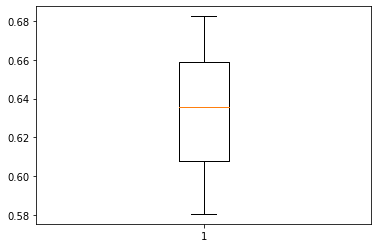

for the SVC we get the following plot


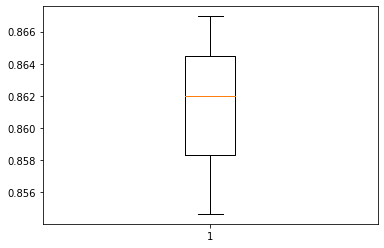

In [ ]:
#YOUR CODE STARTS HERE#
db = (pd.DataFrame(grid_search1.cv_results_).sort_values('rank_test_score'),pd.DataFrame(grid_search2.cv_results_).sort_values('rank_test_score'))
params = [db[0]["params"][1],db[0]["params"][2],db[0]["params"][3],db[1]["params"][1],db[1]["params"][2],db[1]["params"][3]]
results = np.zeros((2,3))
for  count, method  in enumerate(params):
  model = neighbors.KNeighborsClassifier(method["KNN__n_neighbors"]) if count<3  else svm.SVC(C = method["SVC__C"])
  vectorizer = feature_extraction.text.TfidfVectorizer(strip_accents = "unicode", preprocessor = None, tokenizer= method['vect__tokenizer'], ngram_range=method['vect__ngram_range'], stop_words = method["vect__stop_words"])
  vect_train_x = vectorizer.fit_transform(X_train)
  vect_test_x = vectorizer.transform(X_test)
  model = neighbors.KNeighborsClassifier(method["KNN__n_neighbors"]) if "KNN__n_neighbors" in list(method.keys()) else svm.SVC(C = method["SVC__C"])
  model.fit(vect_train_x, y_train)
  results[int(count >= 3)][count%3] = metrics.f1_score(y_test, model.predict(vect_test_x)) ## Vedere come funziona il predict di svc
print("for the KNN we get the following plot")
plt.boxplot(results[0,:])
plt.show()
print("for the SVC we get the following plot")
plt.boxplot(results[1,:])
plt.show()
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

For each plot produced, which combination of hyper-parameters would you select?

**Use at most 2 sentences (per plot).**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

for the KNN we choose the following configuration: KNN__n_neighbors = 5 vect__ngram_range = (1, 2), vect__stop_words: english, vect__tokenizer:  stemming_tokenizer

for the SVC we choose the following configuration: SVC__C = 0.5, vect__ngram_range = (1, 1), vect__stop_words: None, vect__tokenizer =  None



### 1.1.7
For each of the optimisations, obtain a classifier using the parameters you selected in step 1.1.6.

Apply the classifier(s) to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#
vectorizer = feature_extraction.text.TfidfVectorizer(strip_accents = "unicode", preprocessor = None, tokenizer= stemming_tokenizer, ngram_range=(1,2), stop_words="english")
vect_train_x = vectorizer.fit_transform(X_train)
vect_test_x = vectorizer.transform(X_test)
model = neighbors.KNeighborsClassifier( n_neighbors = 5)
model.fit(vect_train_x, y_train)
m1 = metrics.confusion_matrix(y_test, model.predict(vect_test_x))



vectorizer = feature_extraction.text.TfidfVectorizer(strip_accents = "unicode", preprocessor = None, tokenizer= None, ngram_range=(1,1),stop_words=None)
vect_train_x = vectorizer.fit_transform(X_train)
vect_test_x = vectorizer.transform(X_test)
model = svm.SVC(C = 0.5)
model.fit(vect_train_x, y_train)
m2 = metrics.confusion_matrix(y_test, model.predict(vect_test_x))


print(m1/sum(sum(m1)))
print(m2/sum(sum(m2)))








#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


[[0.35914286 0.14085714]
 [0.15085714 0.34914286]]
[[0.44685714 0.05314286]
 [0.072      0.428     ]]


## Part 1.2
In this part, we will perform a one-hot encoding of the data, then train a classifier, optimising its hyper-parameters.

The goal is to maximise accuracy on the test set defined in step 1.1.2

### 1.2.1
Use the same data partitioned in part 1.1.2.

Transform the data with one-hot encoding.

In [ ]:
#YOUR CODE STARTS HERE#
token_train_x = set()
X_train_dummies = pd.get_dummies(X_train)
scaler = preprocessing.StandardScaler()
X_train_dummies=scaler.fit_transform(X_train_dummies)

print(X_train_dummies)











#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[[-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]
 [-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]
 [-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]
 ...
 [-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]
 [-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]
 [-0.00710095 -0.00710095 -0.01004252 ... -0.00710095 -0.00710095
  -0.00710095]]


### 1.2.2
Before training the classifier, transform the data using Principal Component Analysis.

Taking into account the objective of Part 1.2 and the limitations explained in the following steps, estimate and select the best number of components.

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

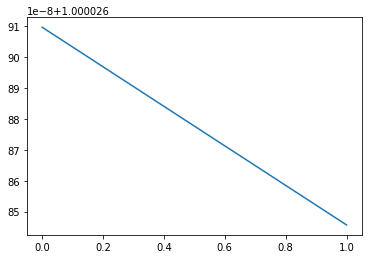

In [ ]:
#YOUR CODE STARTS HERE#
pca = decomposition.PCA(n_components=2)
PCAX_train = pca.fit_transform(X_train_dummies)
y = np.zeros(2)
for i in range(2):
  y[i] = np.std(PCAX_train[:,i])
plt.plot(range(2),y)











#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Explain your decision in **at most 2 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

we plotted the variance level varying the number of components and we took 2 components in order to balance the explanatory variance and the execution time.

### 1.2.3
You must optimise the hyper-parameters of a classifier by respecting the following limits:
> Regarding the classifier:
  * The classifier must be **KNeighborsClassifier**
  * The algorithm used must be **"brute"**.
  * It is forbidden to run the algorithm in *parallel* (must be specified)

> Regarding the optimisation:
  * A **9-fold** Cross-Validation must be performed
  * You must test **exactly 20** configurations
  * Optimisation CANNOT take longer than **100 seconds**. Print out the execution time
  * It is forbidden to run the optimisation in *parallel* (must be specified)

In [ ]:
#YOUR CODE STARTS HERE#
start = time.time()
model = neighbors.KNeighborsClassifier()
parameters_knn = {'n_neighbors': [1,2,3,4,5],"weights" : ["uniform", "distance"],"p":[1,2],"algorithm" : ["brute"]}
grid_search = model_selection.GridSearchCV(model, parameters_knn,scoring = metrics.make_scorer(metrics.accuracy_score),cv = 9, n_jobs = 1, verbose = 1)
grid_search.fit(PCAX_train, y_train)
end = time.time()
print('It took {} seconds'.format(round(end-start)))
printing(grid_search)



















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Fitting 9 folds for each of 20 candidates, totalling 180 fits
It took 93 seconds

Best Estimator:
KNeighborsClassifier(algorithm='brute', weights='distance')

Best Parameters:
{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

Used Scorer Function:
make_scorer(accuracy_score)

Number of Folds:
9



### 1.2.4
Select the combination of hyper-parameters that obtains the **best accuracy**.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#
model = neighbors.KNeighborsClassifier(algorithm='brute', n_neighbors=5, p = 2, weights='distance')
model.fit(PCAX_train, y_train)

X_testDummies = pd.get_dummies(X_test)
X_testDummies = X_testDummies.reindex(columns = pd.get_dummies(X_train).columns, fill_value=0)
X_testDummies = scaler.transform(X_testDummies)
PCAX_test = pca.fit_transform(X_testDummies)
m2 = metrics.confusion_matrix(y_test, model.predict(PCAX_test))

print(m2/sum(sum(m2)))

















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

[[0.45542857 0.04457143]
 [0.49057143 0.00942857]]


# Part 2
In this part of the homework, more complex data encodings will be used.

## Part 2.0
Import here **ALL** the Python packages that you need for Part 2.

In [ ]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.8 MB/s 
     |████████████████████████████████| 4.2 MB 26.9 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 59.2 MB/s 
     |████████████████████████████████| 6.6 MB 49.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=af015de35d5a5786d3e9d24e35b53cc93b19013fe4a22c0e6098f1fbb8ddaef2
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Part 2.1
In this part, we will use a Transformer to obtain sentence embeddings for each document.

We will then train a classifier, optimising its hyper-parameters.

The goal is to maximise precision on the test set defined in step 1.1.2, but it is necessary to have a recall of **at least 70%**, according to the optimisation results.


### 2.1.1
Separate the training set created in step 1.1.2 into two parts: training set and validation set, with a **75/25 split**.

From now on, when we refer to the training set, we are referring to the training set created in this step and no longer to the training set created in step 1.1.2.

Print out the percentage of samples with positive labels in the training, validation and test set.

In [ ]:
#YOUR CODE STARTS HERE#
X_train_ = [(X_train[i], i) for i in range(len(X_train))] # in order to split correctly the X_train ( train_x, X_val)
train_x, X_val, train_y, y_val = model_selection.train_test_split(X_train_, y_train,
                                                    test_size=0.25, shuffle=True,
                                                    random_state= 2468)
print('The percentage of positive labels in the train set is: {}%'.format(
    round(100*sum(train_y>0)/len(train_y), 2)))
print('The percentage of positive labels in the validation set is: {}%'.format(
    round(100*sum(y_val>0)/len(y_val), 2)))
val_indices=[X_val[i][1] for i in range(len(X_val))]
for split in ['train_x', 'X_val']:
  exec(f'{split} = np.array([i[0] for i in {split}])')
train_x = np.array(train_x.astype('str'))
X_val = np.array(X_val.astype('str'))
train_y = np.array(train_y.astype('int'))
y_val = np.array(y_val.astype('int'))
ps = model_selection.PredefinedSplit(test_fold=[1*int(i in val_indices) -1 * int(i not in val_indices) for i in range(len(X_train))])

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The percentage of positive labels in the train set is: 50.05%
The percentage of positive labels in the validation set is: 49.87%


### 2.1.2
Following the *constraints* imposed by Part 2.1 and by the following steps, select **at MOST 2 different sentence-transformers models** and instantiate them.


In [ ]:
#YOUR CODE STARTS HERE#
# we define the models
mpnet_all = SentenceTransformer('all-mpnet-base-v2')
mpnet_pa = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
mpnet_all.max_seq_length = 100
mpnet_pa.max_seq_length = 100












#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

### 2.1.3
Use all sentence transformers selected in step 2.1.2 to encode training, validation and test set data.

EACH model MUST take **LESS than 2 minutes** to process ALL data. For each model, print out the time taken for encoding each set, and the total time

In [ ]:
#YOUR CODE STARTS HERE#
start = time.time()
# we encode the data
all__train_embeddings = mpnet_all.encode(X_train)
all__test_embeddings = mpnet_all.encode(X_test)
intermediate = time.time()
print(f'First embedding took {round(intermediate-start)} s')
pa__train_embeddings = mpnet_pa.encode(X_train)
pa__test_embeddings = mpnet_pa.encode(X_test)
end = time.time()
print(f'Second embedding took {round(end-intermediate)} s')
print(f'Total execution took {round(end-start)} s')






#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

First embedding took 116 s
Second embedding took 116 s
Total execution took 233 s


### 2.1.4
Select **1 classifier** of your choice (from those seen during the course)

In [ ]:
#YOUR CODE STARTS HERE#
# we define the parameters for the KNN classifier
knn = neighbors.KNeighborsClassifier()
param = {
    'n_neighbors': [5, 15, 25],
    'p':[1, 2]
}

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### 2.1.5
Perform the best hyper-parameter optimisation you can afford in **LESS than 10 minutes**. Print out the total time taken.

Use the data prepared in step 2.1.3. If you have performed two encodings, keep in mind that the maximum total optimisation time is STILL 10 minutes (*and NOT 20!*).

Multiple code cells are provided, but it is **NOT** mandatory to use them all.

In [ ]:
#YOUR CODE STARTS HERE#
tests = []
start = time.time()
# we proceed with the first GridSearch to find the best configuration
all_grid = model_selection.GridSearchCV(knn, param, scoring = metrics.make_scorer(metrics.f1_score), n_jobs=-1, cv=ps)
all_grid.fit(all__train_embeddings, y_train)
print('The best parameters were:')
print(all_grid.best_params_)
print(f'\n Because they got a f1 score of {all_grid.best_score_}')
print(f'It took {round(time.time()-start)}s \n\n\n')
all_grid_=pd.DataFrame(all_grid.cv_results_)
for i in range(6):
  useful = all_grid_.iloc[i]
  tests.append(['all', useful['mean_test_score'], useful['param_n_neighbors'], useful['param_p']])
start = time.time()
pa_grid = model_selection.GridSearchCV(knn, param, scoring = metrics.make_scorer(metrics.f1_score), n_jobs=-1, cv=ps)
pa_grid.fit(pa__train_embeddings, y_train)
print('The best parameters were:')
print(pa_grid.best_params_)
print(f'\n Because they got a f1 score of {pa_grid.best_score_}')
print(f'It took {round(time.time()-start)}s')
pa_grid_=pd.DataFrame(pa_grid.cv_results_)
for i in range(6):
  useful = pa_grid_.iloc[i]
  tests.append(['pa', useful['mean_test_score'], useful['param_n_neighbors'], useful['param_p']])



#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters were:
{'n_neighbors': 15, 'p': 1}

 Because they got a f1 score of 0.7845473765135499
It took 137s 





/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best parameters were:
{'n_neighbors': 25, 'p': 1}

 Because they got a f1 score of 0.8412086797809776
It took 131s


In [ ]:
#YOUR CODE STARTS HERE#
param['n_neighbors'] = [pa_grid.best_params_['n_neighbors']+ i for i in [-2, -2, 1, 2]] 
param['p'] = [pa_grid.best_params_['p']] 
start = time.time() # we proceed with the second Gridsearch to find the best configuration
all_grid = model_selection.GridSearchCV(knn, param, scoring = metrics.make_scorer(metrics.f1_score), n_jobs=-1, cv=ps)
all_grid.fit(all__train_embeddings, y_train)
print('The best parameters were:')
print(all_grid.best_params_)
print(f'\n Because they got a f1 score of {all_grid.best_score_}')
print(f'It took {round(time.time()-start)}s \n\n\n')
all_grid_=pd.DataFrame(all_grid.cv_results_)
for i in range(4):
  useful = all_grid_.iloc[i]
  tests.append(['all', useful['mean_test_score'], useful['param_n_neighbors'], useful['param_p']])
start = time.time()
pa_grid = model_selection.GridSearchCV(knn, param, scoring = metrics.make_scorer(metrics.f1_score), n_jobs=-1, cv=ps)
pa_grid.fit(pa__train_embeddings, y_train)
print('The best parameters were:')
print(pa_grid.best_params_)
print(f'\n Because they got a f1 score of {pa_grid.best_score_}')
print(f'It took {round(time.time()-start)}s')
pa_grid_=pd.DataFrame(pa_grid.cv_results_)
for i in range(4):
  useful = pa_grid_.iloc[i]
  tests.append(['pa', useful['mean_test_score'], useful['param_n_neighbors'], useful['param_p']])
test = pd.DataFrame(tests, columns=['model', 'score', 'k_neighbors', 'p'])
test['k_neighbors'] = test['k_neighbors'].astype('category')
test['p'] = test['p'].astype('category') 
#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

The best parameters were:
{'n_neighbors': 27, 'p': 1}

 Because they got a f1 score of 0.7844414638819698
It took 152s 



The best parameters were:
{'n_neighbors': 27, 'p': 1}

 Because they got a f1 score of 0.8435153237264055
It took 141s


In [ ]:
#YOUR CODE STARTS HERE#



























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We performed a first GridSearch to get the best configuration in term of F1 score, the parameters we used were far apart from each other.
Then  we proceed performing a second GridSearch using new parameters near the best founded configuration.


### 2.1.6
Show, in a manner of your choice, the results obtained.

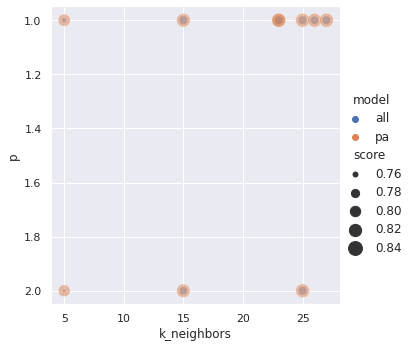

In [ ]:
#YOUR CODE STARTS HERE#
sns.set(rc = {'figure.figsize':(140,140)})
sns.relplot(x = 'k_neighbors',
                y='p',
                data= test, 
                size='score',
                hue= 'model',
                sizes=(10, 200),
                alpha=0.5)



















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Explain the results obtained in **at most 3 sentences**.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

from this graph we see clearly that the model   paraphrase-multilingual-mpnet-base-v2 is consistently better than the all-mpnet-base-v2 model.


### 2.1.7
Select the combination of hyper-parameters that achieves the best performance, as defined in step 2.1.

Apply the classifier that uses these parameters to obtain the confusion matrix on the test data and print it out.

In [ ]:
#YOUR CODE STARTS HERE#
# we get the confusion matrix using the best founded configuration
params = pa_grid.best_params_
model = neighbors.KNeighborsClassifier(n_neighbors = params['n_neighbors'],
                             p=params['p'])
model.fit(pa__train_embeddings, y_train)
confusion = metrics.confusion_matrix(y_test,
                                     model.predict(pa__test_embeddings))
confusion



















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

array([[1476,  274],
       [ 297, 1453]])

## Part 2.2

In this part, you can choose any data transformation you want, as long as each sample, after the transformation, has a size of **exactly 512 values**.

Then repeat as many parts of pipeline 2.1 as you deem necessary; use the data defined in step 2.1.1.

The goal is to find **ONE** classifier that can receive as input for each document a vector of 512 values and that minimises False Positives on the test set defined in step 1.1.2.

The whole process (all Part 2.2) can't take more than **5 minutes**.

### 2.2.1
Prepare the data and the classifier according to the specifications in Part 2.2.


In [ ]:
#YOUR CODE STARTS HERE#
start = time.time()
# we preprocess the data
text = ''.join(map(lambda x: x.lower(), train_x))
text = ' '.join(list(set(text.split(' '))))
vocab = word_tokenize(text)
vocab = list(set(map(lambda x: x.lower(), vocab)))
vectorizer = feature_extraction.text.CountVectorizer(vocabulary=vocab, min_df=0,
                             stop_words=frozenset(),
                             token_pattern=r"(?u)\b\w+\b")
svd = decomposition.TruncatedSVD(n_components=512)
scale = preprocessing.StandardScaler()
# we vectorize the dataset
train_trans = vectorizer.fit_transform(train_x)
# we reduce the number of features
train_trans = svd.fit_transform(train_trans)
train_trans = scale.fit_transform(train_trans)
# we apply SVC
svm_ = svm.SVC(C=1, kernel = 'rbf')
svm_.fit(train_trans, train_y)






































#YOUR CODE ENDS HERE#
#THIS IS LINE 60#

SVC(C=1)

Explain in **at most 3 sentences** which strategy you adopted.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

First we vectorized the dataset using the frequency, then   we applied the SVD to reduce the number of features and finally we applied the Svm classifier.


### 2.2.2
Using the classifier, obtain the confusion matrix on the test data.

Print the time taken for the whole part 2.2

Print out the confusion matrix.



In [ ]:
#YOUR CODE STARTS HERE#
vect_test = vectorizer.transform(X_test)
test_svd = svd.transform(vect_test)
test_svd = scale.transform(test_svd)


print(metrics.confusion_matrix(y_test, svm_.predict(test_svd)))
print(f'Execution time = {round(time.time()-start)}s')










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[[1522  228]
 [ 317 1433]]
Execution time = 110s



# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

5. Now, run the next cell to set some cell tags in the notebook file.

In [ ]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["----------YOUR TEXT STARTS HERE----------","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"
      
        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if "#SHOW_CELL#" not in cell['source'] and ((cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source']) or "#REMOVE_CELL#" in cell['source']):
            cell_tags.add("remove_cell")

        else: #code
          if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")
        
        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2022-HW3.pdf`
  * Rename this file **Surname1_Surname2_DMT2022_HW3_report.pdf** (e.g. Fazzone_Siciliano_DMT2022_HW3_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [ ]:
!jupyter nbconvert /content/DMT2022_HW3.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

7. Now, download this notebook again and change its name.
  * Go to File -> Download -> Download .ipynb
  * Rename the downloaded notebook **Surname1_Surname2_DMT2022_HW3_notebook.ipynb** (e.g. Fazzone_Siciliano_DMT2022_HW3_notebook.ipynb). Sort the surnames alphabetically.
  * **!!! Even if you have downloaded it previously, please repeat the operation at this step !!!**

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.